У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

<Axes: ylabel='Frequency'>

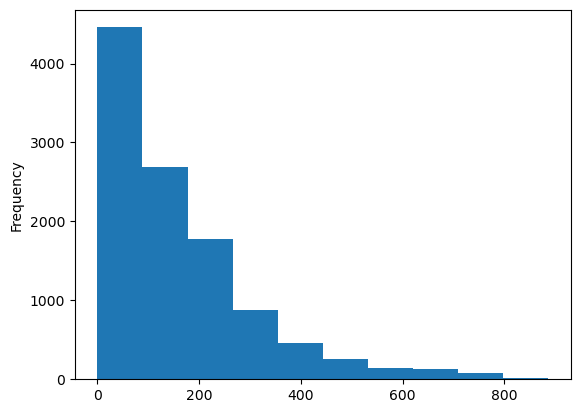

In [3]:
df['registered'].plot.hist()

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

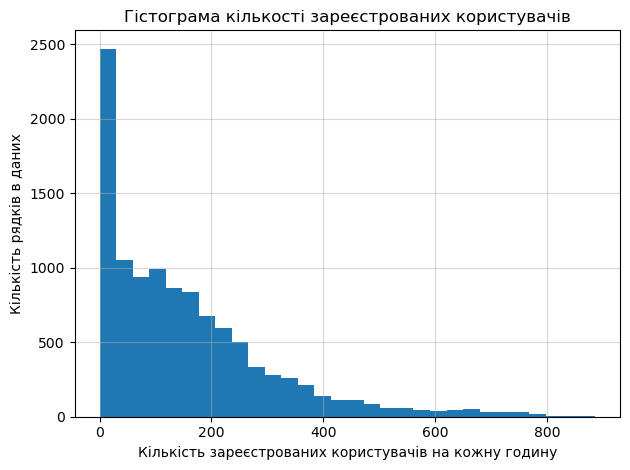

In [4]:
df['registered'].plot.hist(bins=30)
plt.grid(axis='both', alpha=.5)
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів на кожну годину')
plt.ylabel('Кількість рядків в даних')
plt.grid(True)
plt.tight_layout();

На другій гістограмі більш детальний розподіл погодинної кількості зареєстрованих користувачів, вона є більш інформативною та зручною для розуміння (є назва, підписані вісі). Щодо розподілу даних, то на нього впливає сезонність (погода), час доби/дні тижня.  

Має вийти щось таке (може бути без сітки):

![](https://drive.google.com/uc?export=view&id=1Pb3UD8cmg_V0LLf8A4feOepTDXMqEAf8)


--------

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [5]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [6]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [7]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [8]:
zero_registered = df[df['registered'] == 0]

In [9]:
zero_activity_by_day = zero_registered.groupby('dayofweek').size()
zero_activity_by_day

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
dtype: int64

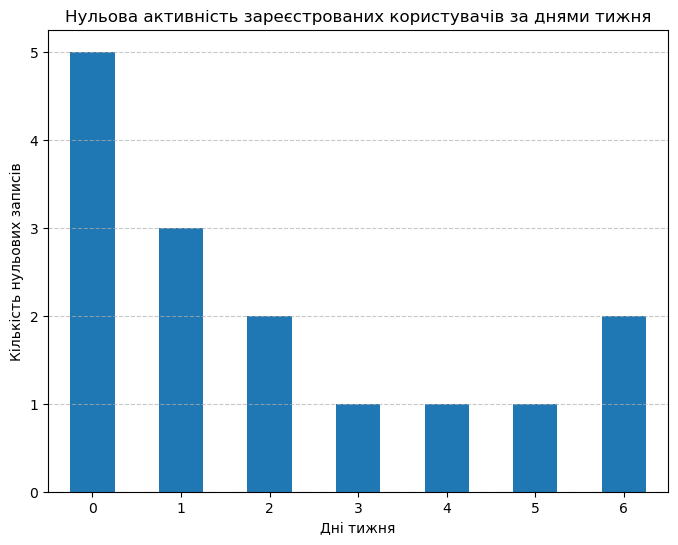

In [24]:
zero_activity_by_day.plot(kind='bar', figsize=(8, 6))
plt.title('Нульова активність зареєстрованих користувачів за днями тижня')
plt.xlabel('Дні тижня')
plt.ylabel('Кількість нульових записів')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1FXNzMa7rTdBQDwXSQfPTtPX5CHZK9A4X)

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

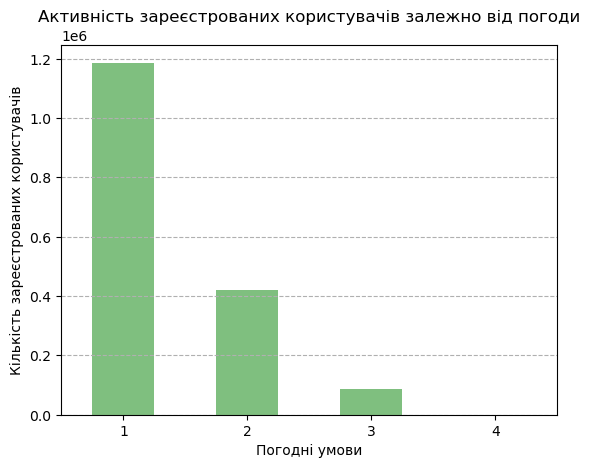

In [13]:
weather_summary = df.groupby('weather')['registered'].sum()
weather_summary.plot(kind='bar', color='green', alpha=.5)
plt.xlabel('Погодні умови')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.title('Активність зареєстрованих користувачів залежно від погоди')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

Ця побудована візуалізація дійсно має логічний сенс з точки зору опису даних. Ми чітко візуально можемо побачити та зробити висновки про пряму залежність ативності користувачів від погодних умов. За гарної погоди (1) кількість користувачів зростає в рази, порівняно з іншими погодними умовами.

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

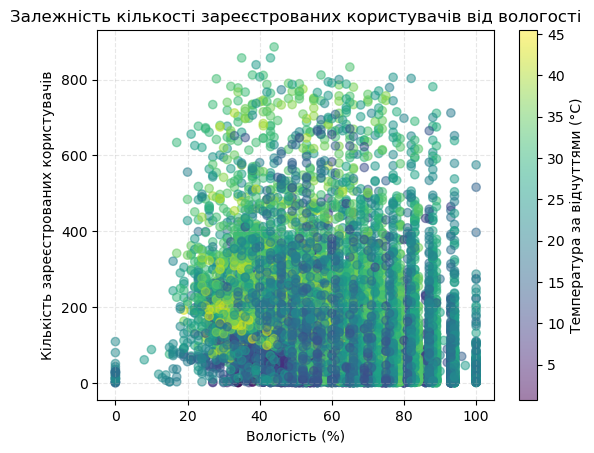

In [21]:
scatter = plt.scatter(df['humidity'], df['registered'], c=df['atemp'], cmap='viridis', alpha=.5)
plt.title('Залежність кількості зареєстрованих користувачів від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість зареєстрованих користувачів')
plt.colorbar(label='Температура за відчуттями (°C)')
plt.grid(alpha=0.3, linestyle='--')

На основі отриманого графіка можна зробити висновки:
- наявний зв'язок між вологістю та кількістю користувачів. Найбільша активність зареєстрованих користувачів спостерігається при вологості 20-80%, потім вона зменшується при високій вологості (>80%), найменша активність користувачів при вологості 0-20%.
- колір діаграми. Жовті точки, що відповідають високій температурі, найбільше спостерігаються при середній вологості (40–60%) і високій активності (400+ користувачів). Фіолетові точки, що відповідають низькій температурі, найбільше концентруються ближче до нижніх значень кількості користувачів (0-200). Це є свідчення зменьшення активності за холодної погоди.
- наійбільше скупчення точок знаходиться в діапазоні значень вологості 40-70%, свідчить, що такі погодні умови є найпоширенішими.
- на графіку наявні точки з низькою вологістю (0–10%) та майже нульовою активністю), це можуть бути помилки збору даних або пов'язано з незвичними погодними умовами.
- на графіку наявні точки в діапазоні високої вологості (>80%) із несподівано високою активністю, це може свідчити по особливі дні.
Висновки:
Найактивніші користувачі зафіксовані при середній вологості та комфортній температурі.
Висока чи низька вологість знижує активність користувачів.
Залежність між вологістю і кількістю користувачів є слабкою, але помітно, що комфортні погодні умови впливають на активність.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1trepX8z23YwyP9P8cAko9IzwOZkvLo8y)